In [150]:
# Initial imports
import os
import json
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import alpaca_trade_api as tradeapi

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\munir\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [151]:
# Load .env enviroment variables
load_dotenv()

# Read your api key environment variable
# Set News API Key
newsapi = NewsApiClient(api_key=os.environ["NEWSAPI_KEY"])

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


In [152]:
# A. Sentiment Analysis

# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='bitcoin',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('btc.json', 'w') as json_file:
    json.dump(btc_headlines, json_file)

In [153]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='ethereum',
                                        language="en",
                                        page_size=100,
                                        sort_by="relevancy")
#save json
with open('eth.json', 'w') as json_file:
    json.dump(eth_headlines, json_file)

In [154]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head(10)



,date,text,compound,positive,negative,neutral
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
3,2021-03-03,,0.0000,0.000,0.000,0.000
4,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
5,2021-02-25,TL;DR: Enter the The Complete Bitcoin (BTC) In...,0.8316,0.246,0.000,0.754
6,2021-03-15,A proposed law in India would make it a crime ...,-0.2500,0.068,0.095,0.838
7,2021-02-23,New York (CNN Business)Bitcoin's roller coaste...,0.1027,0.042,0.000,0.958
8,2021-02-17,Blockchain.com has announced that it has raise...,0.5994,0.145,0.000,0.855
9,2021-02-25,"This morning Coinbase, an American cryptocurre...",0.4404,0.088,0.000,0.912


In [155]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head(10)



,date,text,compound,positive,negative,neutral
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
5,2021-02-27,NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
6,2021-02-20,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
7,2021-03-16,A security breach at cryptocurrency platform R...,0.0258,0.112,0.083,0.805
8,2021-02-18,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856
9,2021-02-18,"NEW YORK (Reuters) - Ethereum, the second larg...",0.5719,0.139,0.000,0.861


In [156]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,95.000000,95.000000,95.000000,95.000000
mean,0.116123,0.052189,0.023653,0.913642
std,0.344172,0.063532,0.052268,0.124688
min,-0.906200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.859000
50%,0.000000,0.042000,0.000000,0.932000
75%,0.368800,0.086000,0.000000,1.000000
max,0.851900,0.260000,0.326000,1.000000


In [157]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,92.000000,92.000000,92.000000,92.000000
mean,0.143040,0.064402,0.031152,0.904457
std,0.396419,0.067319,0.053693,0.081866
min,-0.910000,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.850750
50%,0.025800,0.051500,0.000000,0.921000
75%,0.475775,0.098500,0.062000,0.977500
max,0.877900,0.251000,0.299000,1.000000


In [158]:
# Please refer to answers in Readme.md file

In [159]:
# B. Natural Language Processing
# a. Tokenizer

# Initial imports
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [160]:
# Complete the tokenizer function

def tokenizer(article):
   """Tokenizes text."""


   regex = re.compile("[^a-zA-Z ]")
    
   re_clean = regex.sub('', article)

# Remove the stop words
   sw = set(stopwords.words('english'))
    
# Create a tokenized list of the words
   words = word_tokenize(re_clean)
    
# Lemmatize words into root words
   lem = [lemmatizer.lemmatize(word) for word in words]
    
# Convert the words to lowercase
   output = [word.lower() for word in lem if word.lower() not in sw]
   tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
   
    
   return tokens


In [161]:
# Create a new tokens column for Bitcoin

btc_df['tokens'] = btc_df.apply(lambda x : tokenizer(x['text']), axis=1)
btc_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"One, of, the, strictest, crackdown, worldwideP..."
1,2021-03-16,The hacker behind last years big Twitter hack\...,-0.5106,0.000,0.142,0.858,"The, hacker, behind, last, year, big, Twitter,..."
2,2021-02-26,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"Some, thing, are, best, left, a, mystery, at, ..."
3,2021-03-03,,0.0000,0.000,0.000,0.000,
4,2021-02-16,"Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"Bitcoin, is, the, future, again, this, morning..."
...,...,...,...,...,...,...,...
90,2021-03-09,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.000,1.000,"By, Reuters, StaffFILE, PHOTO, A, representati..."
91,2021-03-01,LONDON (Reuters) - Goldman Sachs Group Inc has...,0.0000,0.000,0.000,1.000,"LONDON, Reuters, Goldman, Sachs, Group, Inc, h..."
92,2021-02-25,"February\r\n25, 2021\r\n5 min read\r\nThis sto...",0.0000,0.000,0.000,1.000,"February, min, readThis, story, originally, ap..."
93,2021-03-09,Opinions expressed by Entrepreneur contributor...,0.0000,0.000,0.000,1.000,"Opinions, expressed, by, Entrepreneur, contrib..."


In [162]:
# Create a new tokens column for Ethereum

eth_df['tokens'] = eth_df.apply(lambda x : tokenizer(x['text']), axis=1)
eth_df

,date,text,compound,positive,negative,neutral,tokens
0,2021-03-15,Famed auction house Christies just sold its fi...,0.0000,0.000,0.000,1.000,"Famed, auction, house, Christies, just, sold, ..."
1,2021-03-15,One of the strictest crackdowns worldwide\r\nP...,-0.5574,0.000,0.110,0.890,"One, of, the, strictest, crackdown, worldwideP..."
2,2021-02-18,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"Worried, that, the, GeForce, RTX, will, be, so..."
3,2021-03-16,Here's everything you need to know about non-f...,-0.1531,0.000,0.062,0.938,"Heres, everything, you, need, to, know, about,..."
4,2021-03-06,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"NFTs, are, the, latest, cryptocurrency, rage, ..."
...,...,...,...,...,...,...,...
87,2021-03-08,Companies outside the U.S. are now following T...,0.0000,0.000,0.000,1.000,"Companies, outside, the, US, are, now, followi..."
88,2021-02-24,"The hotly anticipated ray-tracing, advanced ga...",0.2500,0.067,0.000,0.933,"The, hotly, anticipated, raytracing, advanced,..."
89,2021-02-25,About This Page\r\nThis is a Techmeme archive ...,0.0000,0.000,0.000,1.000,"About, This, PageThis, is, a, Techmeme, archiv..."
90,2021-03-05,AMD’s graphics card market share has become as...,-0.6808,0.049,0.151,0.800,"AMDs, graphic, card, market, share, ha, become..."


In [163]:
# B. Natural Language Processing
# b. NGrams and Frequency Analysis

#Initial Imports

from collections import Counter
from nltk import ngrams

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [164]:
# Generate the Bitcoin N-grams where N=2
corpus = btc_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(char, reuters)",33
1,"(reuters, stafffile)",21
2,"(stafffile, photo)",21
3,"(virtual, currency)",20
4,"(illustration, taken)",20
5,"(reuters, bitcoin)",15
6,"(currency, bitcoin)",14
7,"(photo, representation)",13
8,"(picture, illustration)",11
9,"(representation, virtual)",11


In [165]:
# Generate the Ethereum N-grams where N=2
corpus = eth_df["text"]
bigram_counter(corpus)

,bigram,count
0,"(char, reuters)",9
1,"(record, high)",8
2,"(nonfungible, token)",7
3,"(graphic, card)",6
4,"(reuters, bitcoin)",5
5,"(reuters, stafffile)",5
6,"(stafffile, photo)",5
7,"(geforce, rtx)",4
8,"(char, new)",4
9,"(new, york)",4


In [166]:
# Function token_count generates the top 10 words for a given coin

def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    string = ' '.join(tokens)
    processed = process_text(string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [167]:
# Use token_count to get the top 10 words for Bitcoin
tokens = btc_df["text"]
token_count(tokens, N=10)

,word,count
0,char,92
1,bitcoin,76
2,reuters,66
3,photo,29
4,ha,26
5,new,22
6,currency,22
7,stafffile,21
8,virtual,20
9,illustration,20


In [168]:
# Use token_count to get the top 10 words for Ethereum
tokens = eth_df["text"]
token_count(tokens, N=10)

,word,count
0,char,91
1,bitcoin,35
2,cryptocurrency,27
3,reuters,26
4,new,23
5,ha,22
6,ethereum,18
7,digital,13
8,card,13
9,market,13


In [169]:
# B. Natural Language Processing
# c. Word Cloud

#Initial Imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [170]:
# Function for word cloud 

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)


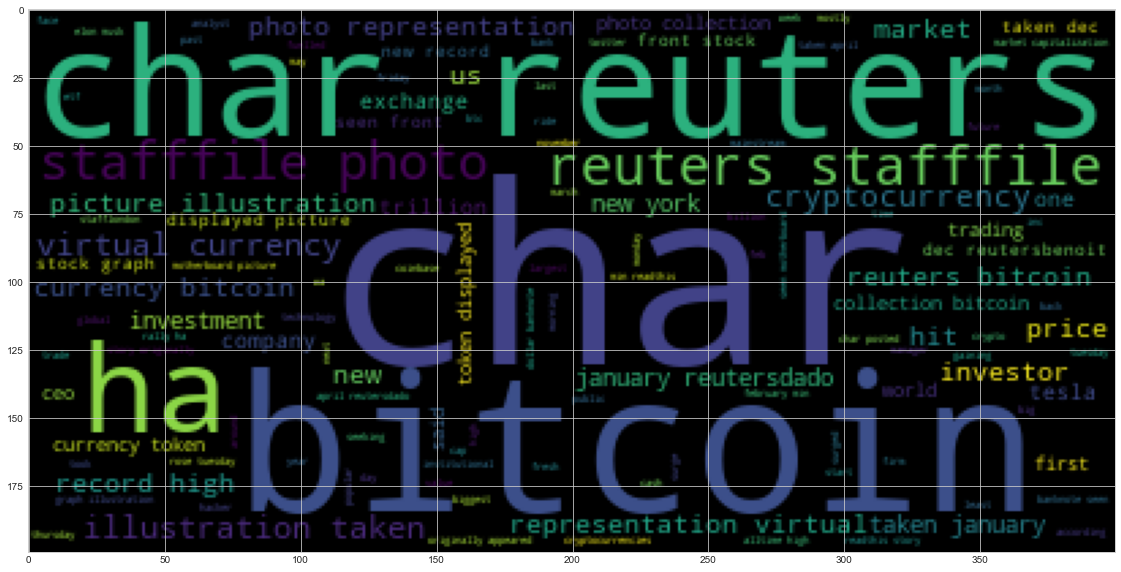

In [171]:
# Generate the Bitcoin word cloud

corpus = btc_df["text"]


big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

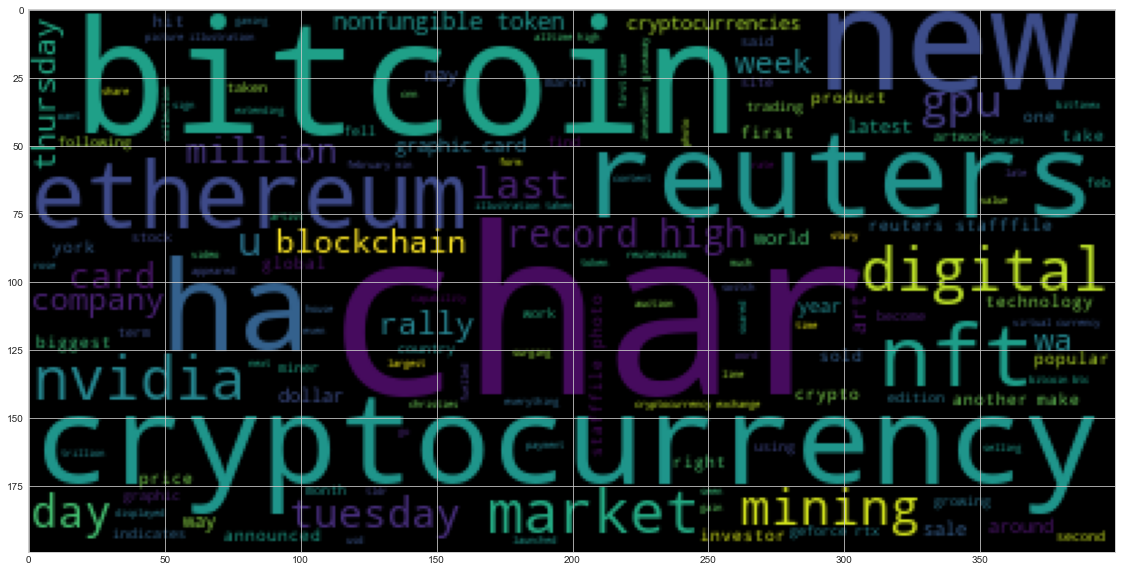

In [172]:
# Generate the Ethereum word cloud

corpus = eth_df["text"]


big_string = ' '.join(corpus)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

In [173]:
# 3.Named Entity Recognition

# Initial Imports
import spacy
from spacy import displacy

In [174]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [175]:
# a. Bitcoin NER

# Concatenate all of the bitcoin text together
concat_btc = btc_df['text'].str.cat()

In [176]:
# Run the NER processor on all of the text
btc_doc = nlp(concat_btc)

# Add a title to the document
btc_doc.user_data["title"] = "BITCOIN NER WORDS"


In [177]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [178]:
# List all Entities
print([ent.text for ent in btc_doc.ents if ent.label_ == 'GPE'])

['India', 'San Francisco', 'India', 'Binance', 'Changp', 'Pristina', 'Kosovo', 'HONG KONG', 'Bitcoin', 'U.S.', 'U.S.', 'San Francisco', 'America', 'U.S.', 'YORK', 'LONDON', 'LONDON', 'LONDON', 'NEW YORK', 'LONDON', 'New York City', 'U.S.', 'NEW YORK', 'chars]NEW YORK', 'chars]NEW YORK', 'New Delhi', 'India', 'LONDON', 'NEW YORK', 'LONDON', 'HONG KONG', 'Montana', 'Carolinas', 'New York City', 'Moscow', 'U.S.', 'NEW YORK', 'chars]NEW YORK', 'chars]NEW YORK', 'Montana', 'Carolinas', 'New York City', 'U.S.', 'LONDON', 'LONDON', 'E3', 'Los Angeles', 'U.S.', 'Bitcoin']


In [179]:
# b. Ethereum NER

# Concatenate all of the ethereum text together
concat_eth = eth_df['text'].str.cat()

In [180]:
# Run the NER processor on all of the text
eth_doc = nlp(concat_eth)

# Add a title to the document
eth_doc.user_data["title"] = "ETHEREUM NER WORDS"


In [181]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [182]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])

['India', '3060', 'chars]NEW YORK', 'chars]NEW YORK', 'San Francisco', 'Hong Kong', 'China', 'HONG KONG', 'India', 'SINGAPORE', 'U.S.', 'U.S.', 'chars]NEW YORK', 'LONDON', 'U.S.', 'U.S.', 'U.S.', 'chars]New York', 'NEW YORK', 'NEW YORK', 'WASHINGTON', 'U.S.', 'Hong Kong']
